In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction

Algoritmo de Shor 
==============

*Author: Bruna Shinohara de Mendonça. Last updated: 9 Jul 2022.*

Nessa aula, vamos falar desse algoritmo de grande importância para a segurança da informação: o algoritmo de Shor.

O que é um protocolo de criptografia?
==============

É alguma função na qual se transforma uma mensagem em alguma outra mensagem, de forma em que a comunicação seja privada. Coisas como:

- Trocar letras por outras letras, ou um conjunto de letras, seguindo um padrão
- Dificultar a visualização da mensagem (estenografia)

Entre outros.

Como fazer um protocolo?
==============

Em geral, busca-se um problema matemático que seja considerado “difícil”, até para uma máquina, de forma em que a quebra da criptografia demore um tempo impraticável.

Em termos mais técnicos, do tipo "NP" (fácil de testar uma resposta que já se saiba, difícil de achar solução em tempo hábil).

Simétrica versus Assimétrica
==============
Na simétrica, utiliza-se a mesma chave para criptografar e decifrar. Na assimétrica, chaves diferentes.

A Assimétrica é mais segura, mas a simétrica funciona melhor para grandes fluxos de informação (ex: AES)

Dois problemas NP importantes para protocolos 
==============

- Logaritmo discreto de curva elíptica (ECDLP)
- Fatoração em primos

São problemas diferentes, mas ambos envolvem aritmética modular [1].

Algoritmo de Shor
==============

O algoritmo de Shor resolve mais rapidamente o problema de fatoração de primos.

O problema consiste na decomposição de um número em multiplicação de números que sejam primos, e não há forma rápida de fazer isso. Essa é a base pra criptografia RSA, uma das mais importantes criptografias assimétricas atuais.

Passos do algoritmo de Shor
===========================================

Dado um número N que queremos fatorar, os passos do algoritmo são

<ol>
   <li>
        Escolher um número a $<$ N que seja coprimo de N: 
        

$$
\text{MDC}(N,a) = 1.$$


   </li>
    
   <li>
       Encontrar a ordem r. A ordem é definida como o menor número natural que satisfaça:
$$
a^r = 1 \text{mod} N $$
       
   </li>

   <li>
       Se r for ímpar ou 
$$
a^{r/2} = -1 \text{mod} N,$$
       escolhe-se outro número.
       
   </li>

   <li>
       Se r for par, temos que 
$$
\{\text{MDC}(a^{r/2} + 1), \text{MDC}(a^{r/2} - 1)\}$$
       São dois divisores não-triviais de N.
       
   </li>
 </ol>


Exemplo de fatoração: 15 = 5x3
==============

Vamos pegar um número pequeno para esse exemplo: 15. Já sabemos que a sua decomposição em primos seria 5 x 3.

Como isso é feito com o Algoritmo de Shor, em sua versão clássica?


Passos do algoritmo de Shor
===========================================

N = 15.

<ol>
   <li>
        Escolher um número a $<$ N que seja coprimo de N: vamos escolher $a = 13$.

   </li>
    
   <li>
       Encontrar a ordem r, tal que 
       $$
13^r = 1 \text{mod} 15 $$
       Vamos testar diferentes valores de r:
       $$13^1 = 13 \text{mod} 15$$
       $$13^2 = 4 \text{mod} 15$$
       $$13^3 = 7 \text{mod} 15$$
       $$13^4 = 1 \text{mod} 15$$
       $$13^5 = 13 \text{mod} 15$$
       $$13^6 = 4 \text{mod} 15$$
       $$...$$
   </li>
Vemos que r = 4 satisfaz a condição.

   <li>
       Temos que 
$$
\{\text{MDC}(13^{4/2} + 1), \text{MDC}(13^{4/2} - 1)\}$$
$$
 = \{5,3\}$$
       
   </li>
São dois divisores não-triviais de 15.

 </ol>


Algoritmo de Shor - versão quântica
===========================================

Na versão quântica, vamos seguir os mesmos passos e resolver o problema de encontrar a ordem r por meio de uma subrotina chamada *Estimativa de fase quântica*, que pos sua vez é realizada via *Transformada de Fourier Quântica*. Vamos falar brevemente sobre ambas antes de mostrar a versão quântica de Shor.


Transformada de Fourier Quântica e sua inversa
===========================================

A transformada CLÁSSICA de Fourier transforma um vetor de números complexos $x$, com N componentes, em um outro vetor de números complexos, $y$.

<ol>
   
$$
y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1} x_j e^{2 \pi i j k /N}$$

Analogamente, a versão clássica relaciona bases:
    
$$
\vert j \rangle = \frac{1}{\sqrt{N}}\sum_{k = 0}^{N-1} e^{2 \pi i j k /N}\vert k\rangle$$

Se tivermos multiplos qubits ($2^n$, no caso), é possível mostrar que, com $\vert k\rangle$ sendo a base computacional [3],

$$
\vert j \rangle = \frac{1}{\sqrt{2^n}}(\vert 0\rangle +  e^{2 \pi i 0.j_n}\vert 1\rangle)(\vert 0\rangle +  e^{2 \pi i 0.j_{n-1}...j_n /N}\vert 1\rangle)...(\vert 0\rangle +  e^{2 \pi i 0.j_1...j_n}\vert 1\rangle)$$


Aqui fica mais fácil de visualizar como a QFT pode ser implementada via uma série de rotações controladas, da forma
    $$R_k = \left[\begin{array}{ccc}
1 & 0\\
0 & e^{2 \pi i/2^k}
\end{array}\right]$$

</ol>


Estimação de fase quântica
===========================================

Esse algoritmo permite encontrar a fase $\phi$ quando temos algo da forma
$$ U \vert \psi \rangle = e^{i \phi} \vert \psi \rangle$$.
Isso pode ser feito com uma transformada de Fourier inversa.

Nesse algoritmo, temos duas registradoras (dois conjuntos de qubits com funções diferentes). Precisamos de um número $t$ de qubits na primeira registradora (quanto maior t, melhor aproximação). Na segunda registradora, vamos armazenar o estado $\vert \psi \rangle$.
</ol>
Podemos obter a fase (o argumento da exponencial) fazendo uma transformada inversa de Fourier.

## Shor: versão quântica

Agora vamos entender como o algoritmo de Shor, em sua versão quântica, se relaciona com o problema de estimação de fase [2].

Vamos retomar o exemplo da fatoração de N = 15. Os passos serão:


<ol>
   <li>
        Escolher um número a $<$ N que seja coprimo de N: vamos escolher $a = 7$, para variar.

   </li>
    
   <li>
       Encontrar a ordem r.
   </li>
Vamos inicializar duas registradoras. A primeira registradora, representada por $\vert k \rangle$, terá $t$ qubits - esse valor, novamente, vai se relacionar com a precisão do algoritmo. A segunda registradora terá a quantidade de qubits necessárias para representar o estado $\vert \psi \rangle$.    
Aplicando $t$ Hadamard para colocar os estados da primeira registradora em superposição;
   
$$
\vert j \rangle
= \frac{1}{\sqrt{2^t}} \sum_{k = 0}^{2^t-1}\vert k \rangle \vert \psi \rangle
= \frac{1}{\sqrt{2^t}} (\vert 0 \rangle + \vert 1 \rangle + ... + \vert 2^t - 1 \rangle)\vert \psi \rangle $$
    <li>

Vamos aplicar uma operação chamada *Oráculo*, $U$. Não vamos explicitar a forma do oráculo nesse momento, apenas considere uma operação tal que: 

$$
U \vert \psi \rangle
= \frac{1}{\sqrt{2^t}} \sum_{k = 0}^{2^t-1}\vert k \rangle \vert x^k \text{mod} N \rangle
$$

Perceba que, agora, ambas registradoras dependem de $k$. Expandindo a soma, 

$$
U \vert \psi \rangle
= \frac{1}{\sqrt{2^t}} 
(\vert 0 \rangle \vert 1 \rangle
+\vert 1 \rangle \vert 7 \rangle
+\vert 2 \rangle \vert 4 \rangle
+\vert 3 \rangle \vert 1 \rangle
+...)
$$

Agora, vamos aplicar a Transformada de Fourier inversa na primeira registradora. Vamos obter um histograma de estados e suas probabilidades.
        
Com isso, podemos obter as fases! Convertendo os estados obtidos na medição para decimal, a fase será esse valor dividido pela quantidade total de estados.

Tendo a fase, podemos obter o período. Isso será feito expressando a fase na forma de frações contínuas:
        
$$\phi = a_0 + \frac{1}{a_1 + \frac{1}{a_2 + ...}}$$
        
Como $\phi = s/r$, obtemos o período por meio do denominador que encontrarmos.


## Shor: Implementação no Qiskit


Antes de seguir os passos do algortimo, vamos definir uma função que atuará como Oráculo:

In [2]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

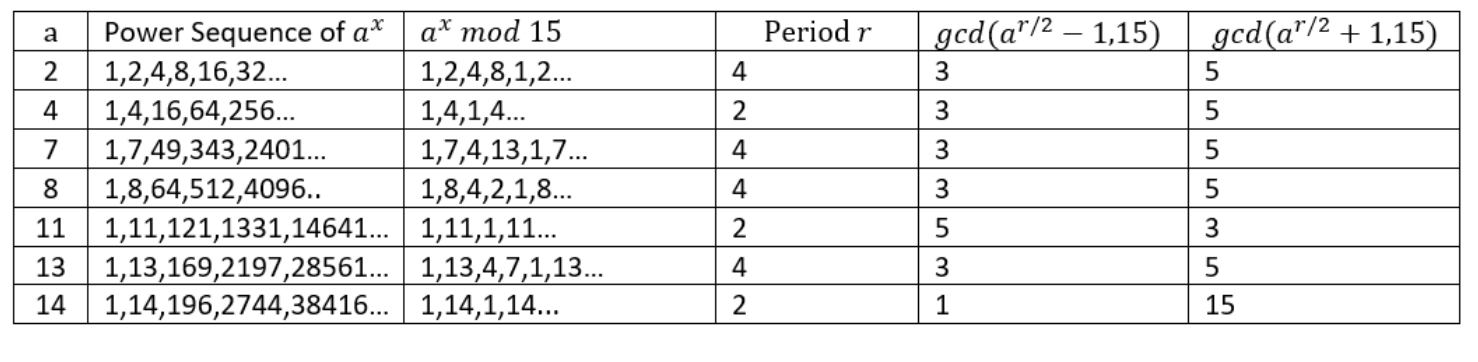
[4]

Vamos definir também uma função que realizará a transformada inversa de Fourier:

In [3]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

Tendo 8 qubits na registradora,
   <li>
        Escolher um número a $<$ N que seja coprimo de N: vamos escolher $a = 7$.

   </li>

In [32]:
n_count = 8
a = 13

Criamos o circuito com as duas registradoras. Precisamos de 4 qubits a mais na primeira para que o oráculo possa atuar.

In [33]:
qc = QuantumCircuit(n_count + 4, n_count)

Em Qiskit, os estados se iniciam em 0. Vamos aplicar os gates Hadarmard em 8 qubits da primeira registradora:

In [34]:
# Initialize counting qubits
# in state |+>
for q in range(n_count):
    qc.h(q)

Sobraram 4 qubits na primeira registradora. Vamos colocar um deles no estado |1>, usando $X$

In [35]:
# And auxiliary register in state |1>
qc.x(3+n_count)

Vamos aplicar o oráculos com o auxílio dos demais qubits da primeira registradora.

In [36]:
# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])

Fazemos a QFT inversa:

In [37]:
# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))

Finalmente medimos! Também vamos usar a função qc.draw para entendermos como o circuito ficou.

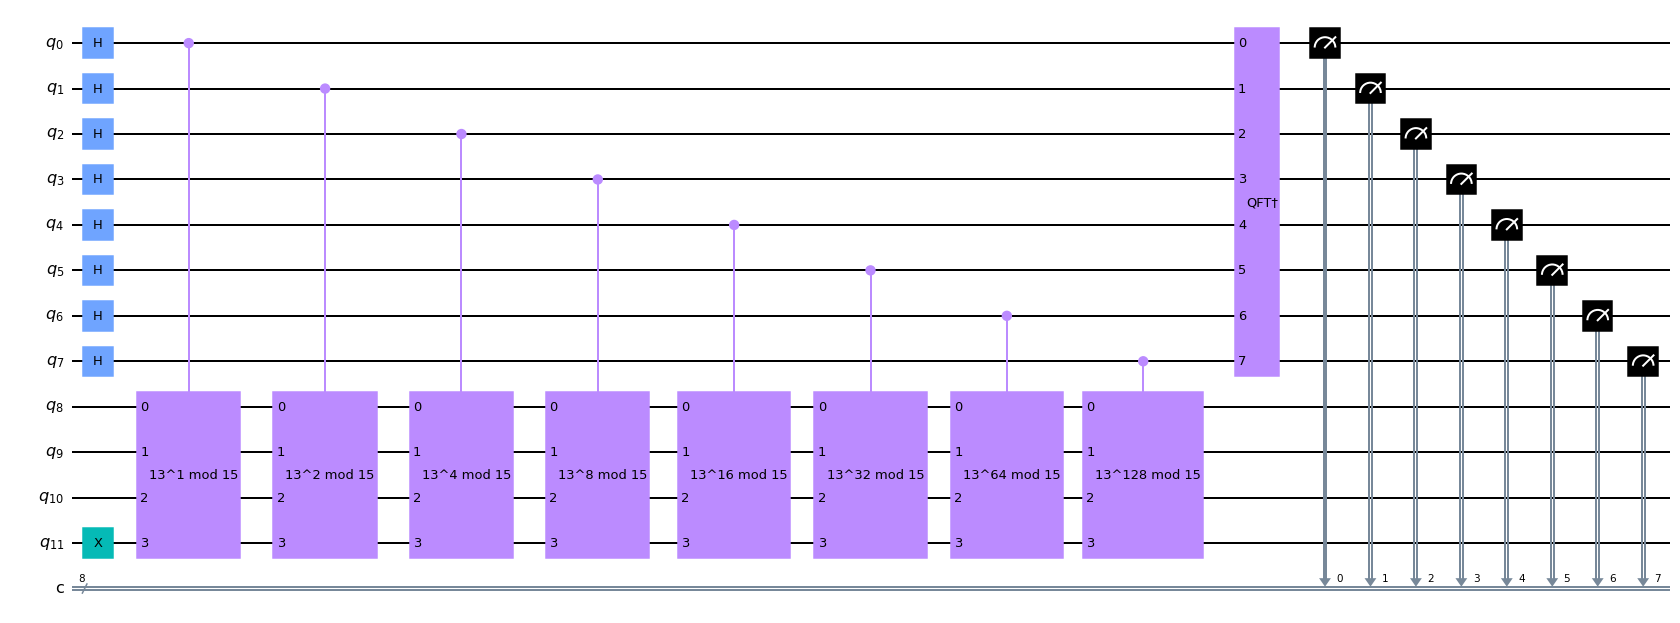

In [38]:
# Measure circuit
qc.measure(range(n_count), range(n_count))
qc.draw(fold=-1, output = 'mpl')  # -1 means 'do not fold' 

Obtemos os estados finais e suas probabilidades enviando esse circuito para um simulador quântico e fazendo um gráfico dos resultados.

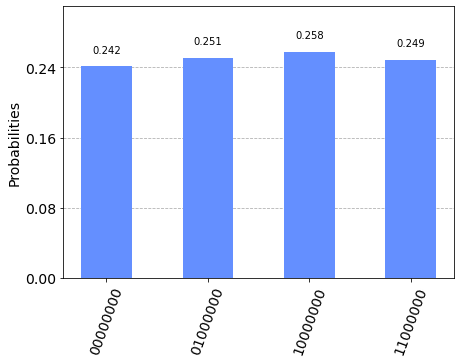

In [39]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

E extraimos as fases. A função a seguir converte em decimal e obtém a fase (lembrando que temos 2^8 = 256 estados)

In [40]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  00000000(bin) =   0(dec)    0/256 = 0.00
1  11000000(bin) = 192(dec)  192/256 = 0.75
2  01000000(bin) =  64(dec)   64/256 = 0.25
3  10000000(bin) = 128(dec)  128/256 = 0.50


Agora, usamos a função Fraction do Python para obter as frações continuas, limitando o denominador em 15 (nosso N).

In [41]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.00      0/1            1
1   0.75      3/4            4
2   0.25      1/4            4
3   0.50      1/2            2


Vamos condensar o que fizemos até agora em uma função única:

In [42]:
def qpe_amod15(a):
    n_count = 8
    qc = QuantumCircuit(4+n_count, n_count)
    for q in range(n_count):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(3+n_count) # And auxiliary register in state |1>
    for q in range(n_count): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q), 
                 [q] + [i+n_count for i in range(4)])
    qc.append(qft_dagger(n_count), range(n_count)) # Do inverse-QFT
    qc.measure(range(n_count), range(n_count))
    # Simulate Results
    aer_sim = Aer.get_backend('aer_simulator')
    # Setting memory=True below allows us to see a list of each sequential reading
    t_qc = transpile(qc, aer_sim)
    qobj = assemble(t_qc, shots=1)
    result = aer_sim.run(qobj, memory=True).result()
    readings = result.get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**n_count)
    print("Corresponding Phase: %f" % phase)
    return phase

phase = qpe_amod15(7) # Phase = s/r
Fraction(phase).limit_denominator(15) # Denominator should (hopefully!) tell us r

Register Reading: 11000000
Corresponding Phase: 0.750000


Fraction(3, 4)

Um pouco mais de Python para conseguir r:

In [43]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(r)

4


Vamos fatorar! Basta importar e usar a função gcd (greatest common divisor).

In [16]:
from math import gcd

N = 15
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[3, 5]


## Referencias

[1]: Modular arithmetic: https://en.wikipedia.org/wiki/Modular_arithmetic

[2]: Implementação do algoritmo de Shor's em Qiskit (inglês): https://qiskit.org/textbook/ch-algorithms/shor.html

[3]: Representação binária: https://mathstats.uncg.edu/sites/pauli/112/HTML/secbinary.html

[4]: Tabela extraída de https://www.qmunity.tech/tutorials/shors-algorithm
